In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [33]:
df = pd.read_csv('dataset.csv')
df.dropna(inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [34]:
df.drop(columns=['Id'], axis=1, inplace=True)

In [3]:
df.loc[:,['Soil_Type7', 'Soil_Type15']].value_counts()

Soil_Type7  Soil_Type15
0           0              15120
dtype: int64

In [4]:
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [5]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

X = (X-X.min())/(X.max()-X.min())
X.fillna(0, inplace=True)
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.369084,0.141667,0.057692,0.192107,0.208571,0.074020,0.870079,0.858065,0.596774,0.897898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.366062,0.155556,0.038462,0.157856,0.200000,0.056604,0.866142,0.877419,0.608871,0.890176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.473817,0.386111,0.173077,0.199553,0.301429,0.461538,0.921260,0.896774,0.544355,0.875304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.464250,0.430556,0.346154,0.180194,0.377143,0.448476,0.937008,0.896774,0.491935,0.888174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.368580,0.125000,0.038462,0.113924,0.207143,0.056749,0.866142,0.870968,0.604839,0.882597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [7]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [8]:
print(len(X_train))
print(len(X_test))

12096
3024


In [9]:
print(len(X_train.columns))

54


## Task 1

#### Defining Adaboost test and train functions from scratch

In [10]:
def weight_updation(w_i, alpha, y, y_pred):   
    new_w_i = w_i * np.exp(-alpha * np.dot(y.to_numpy(), y_pred))   
    return new_w_i

In [11]:
def training_adaboost(XTrain, yTrain, num_rounds):
    
    wc_list = []
    adaboost_parameter_list = []
    alpha = 0
    
    for i in range(0,num_rounds):
        #1. weights initialization
        if i==0:
            w_i = np.ones(len(yTrain)) * 1 / len(yTrain)
        else:
            #4.weight updation
            w_i = weight_updation(w_i, alpha, yTrain, wc_y_predict) 
            w_i = w_i/w_i.sum()
                  
        #base learner/weak classifier training and prediction
        wc = DecisionTreeClassifier(max_depth = 10)     
        wc.fit(XTrain, yTrain, sample_weight = w_i)
        wc_y_predict = wc.predict(XTrain)    
        wc_list.append(wc) # weak_classifiers list      
        
        #2. error computation
        err = sum(w_i * (np.not_equal(yTrain, wc_y_predict)).astype(int))
        
        #3. alpha computation - alpha list size = number of models
        alpha = 0.5 * np.log((1 - err) / err)
        adaboost_parameter_list.append(alpha)
        
        
    return wc_list, adaboost_parameter_list    

In [12]:
def testing_adaboost(adaboost_params, wc_list, XTest, yTest=None):
    test_accuracy = 0
    
    y_pred_tmp = []
    y_pred = []
    
    for i in range(len(wc_list)):
        val = wc_list[i].predict(XTest) * adaboost_params[i]
        y_pred_tmp.append(wc_list[i].predict(XTest) * adaboost_params[i])
    
    # Estimate final predictions
    for i in range(0,len(y_pred_tmp[0])):
        y_pred_ind = 0
        for j in range(0,len(y_pred_tmp)):
            y_pred_ind = y_pred_ind + y_pred_tmp[j][i]    
        y_pred.append(np.sign(y_pred_ind.astype(int)))  
    test_accuracy = accuracy_score(yTest.to_numpy(), y_pred)       
    return test_accuracy

#### Defining Adaboost test and train functions using inbuilt functions

In [13]:
def training_adaboost(XTrain, yTrain, num_rounds):  
    
    adaboost_train = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators = num_rounds)
    adaboost_train.fit(XTrain, yTrain)
    
    return adaboost_train

In [14]:
def testing_adaboost(adaboost_params, XTest, yTest=None):
    y_pred = adaboost_params.predict(XTest)
    if (len(yTest)>0):
        return accuracy_score(yTest, y_pred)
    else:
        return y_pred

In [15]:
train_accuracy_al = [] #train accuracies of 100 adaboost learners
test_accuracy_al = [] #test accuracies of 100 adaboost learners

for num_of_rounds in range(0,100):
    print('Iteration number : ',num_of_rounds)
    adaboost = training_adaboost(X_train, y_train, num_of_rounds+1)
    train_acc = testing_adaboost(adaboost, X_train, y_train)
    train_accuracy_al.append(train_acc)
    test_acc = testing_adaboost(adaboost, X_test, y_test)
    test_accuracy_al.append(test_acc)
    print("Train accuracy : ",train_acc)
    print("Test accuracy : ",test_acc)
    print(' ')

Iteration number :  0
Train accuracy :  0.8199404761904762
Test accuracy :  0.7628968253968254
 
Iteration number :  1
Train accuracy :  0.7533895502645502
Test accuracy :  0.6626984126984127
 
Iteration number :  2
Train accuracy :  0.8269675925925926
Test accuracy :  0.7066798941798942
 
Iteration number :  3
Train accuracy :  0.8698743386243386
Test accuracy :  0.7218915343915344
 
Iteration number :  4
Train accuracy :  0.8870701058201058
Test accuracy :  0.7420634920634921
 
Iteration number :  5
Train accuracy :  0.9071593915343915
Test accuracy :  0.7453703703703703
 
Iteration number :  6
Train accuracy :  0.9346891534391535
Test accuracy :  0.7642195767195767
 
Iteration number :  7
Train accuracy :  0.9405588624338624
Test accuracy :  0.7681878306878307
 
Iteration number :  8
Train accuracy :  0.9519675925925926
Test accuracy :  0.7791005291005291
 
Iteration number :  9
Train accuracy :  0.9634589947089947
Test accuracy :  0.7896825396825397
 
Iteration number :  10
Train a

Train accuracy :  0.9968584656084656
Test accuracy :  0.8498677248677249
 
Iteration number :  85
Train accuracy :  0.9977678571428571
Test accuracy :  0.8452380952380952
 
Iteration number :  86
Train accuracy :  0.9976025132275133
Test accuracy :  0.8518518518518519
 
Iteration number :  87
Train accuracy :  0.9976851851851852
Test accuracy :  0.8521825396825397
 
Iteration number :  88
Train accuracy :  0.9973544973544973
Test accuracy :  0.8531746031746031
 
Iteration number :  89
Train accuracy :  0.9976025132275133
Test accuracy :  0.8568121693121693
 
Iteration number :  90
Train accuracy :  0.997933201058201
Test accuracy :  0.8558201058201058
 
Iteration number :  91
Train accuracy :  0.9990079365079365
Test accuracy :  0.8501984126984127
 
Iteration number :  92
Train accuracy :  0.9985945767195767
Test accuracy :  0.8425925925925926
 
Iteration number :  93
Train accuracy :  0.9978505291005291
Test accuracy :  0.8498677248677249
 
Iteration number :  94
Train accuracy :  0.9

In [16]:
print(len(train_accuracy_al))
print(len(test_accuracy_al))

100
100


### Task 2 - Base Learner Training and Testing

In [23]:
base_learner = DecisionTreeClassifier(max_depth = 10)     
base_learner.fit(X_train, y_train)
y_predict_bl = base_learner.predict(X_test)    #base_learner y_pred
 
#Train accuracy
trainacc_bl = accuracy_score(y_train, base_learner.predict(X_train))
print('Base Learner Train Accuracy : ',trainacc_bl)

#Test accuracy
testacc_bl = accuracy_score(y_test, y_predict_bl)
print('Base Learner Test Accuracy : ',testacc_bl)

Base Learner Train Accuracy :  0.8198578042328042
Base Learner Test Accuracy :  0.7592592592592593


### Task 3 - Graph

In [24]:
x = [i for i in range(0,100)]
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


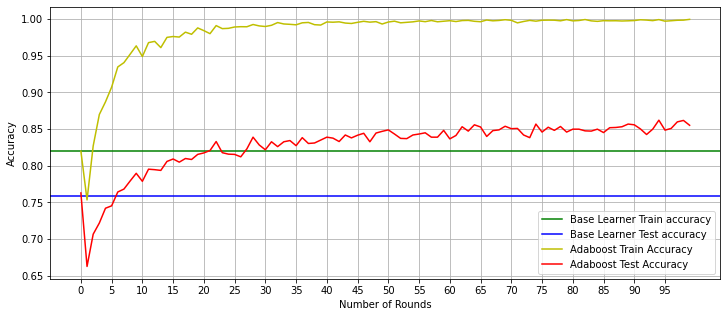

In [25]:
# plot accuracy
plt.figure(figsize=(12,5))
plt.grid()
plt.axhline(y=trainacc_bl, label="Base Learner Train accuracy", color = 'g')
plt.axhline(y=testacc_bl, label="Base Learner Test accuracy", color = 'b')
plt.plot(x, train_accuracy_al, label="Adaboost Train Accuracy", color = 'y') 
plt.plot(x, test_accuracy_al, label="Adaboost Test Accuracy", color = 'r')
plt.xticks(np.arange(min(x), max(x)+1, 5))
plt.legend(loc="lower right")
plt.xlabel("Number of Rounds")
plt.ylabel("Accuracy")
plt.show()

### Task 4 

#### 1. From the above graph for the adaboost models, initially the train and test accuracies(especially at the second iteration) dropped drastically. Later on, the accuracies kept on increasing as the number of rounds increased.
#### 2. The accuracy is proportional to the number of rounds since we have iteratively corrected the mistakes of the weak classifiers by updating weights based on the misclassified data.
#### 2. While training the adaboost classifier, after certain number of iterations the adaboost classifier ouperforms the original base classifier interms of test accuracy. From the above graph, we can say that after the 5th iteration the test accuracy of adaboost model is always greater than the base learner test accuracy.

### Task 5

In [20]:
judge_dataset = pd.read_csv('judge-no-labels.csv')
judge_dataset.dropna(inplace=True)
judge_dataset.info()
judge_dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565892 entries, 0 to 565891
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Id                                  565892 non-null  int64
 1   Elevation                           565892 non-null  int64
 2   Aspect                              565892 non-null  int64
 3   Slope                               565892 non-null  int64
 4   Horizontal_Distance_To_Hydrology    565892 non-null  int64
 5   Vertical_Distance_To_Hydrology      565892 non-null  int64
 6   Horizontal_Distance_To_Roadways     565892 non-null  int64
 7   Hillshade_9am                       565892 non-null  int64
 8   Hillshade_Noon                      565892 non-null  int64
 9   Hillshade_3pm                       565892 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  565892 non-null  int64
 11  Wilderness_Area1                    565892 non-null 

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [21]:
judge_X = judge_dataset.copy()
judge_X.drop(columns=['Id'], axis=1, inplace=True)
judge_X = (judge_X-judge_X.min())/(judge_X.max() - judge_X.min())
judge_X.fillna(0, inplace=True)
judge_X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.410705,0.983333,0.212121,0.0,0.223514,0.377125,0.771654,0.842520,0.614173,0.926391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.412206,0.000000,0.196970,0.0,0.223514,0.372910,0.791339,0.850394,0.598425,0.930573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.427214,0.044444,0.227273,0.0,0.223514,0.418716,0.811024,0.818898,0.539370,0.884428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.425213,0.066667,0.257576,0.0,0.223514,0.414500,0.818898,0.791339,0.492126,0.888610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.423712,0.080556,0.287879,0.0,0.223514,0.410285,0.826772,0.767717,0.452756,0.892792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#judge_X.isna().sum()

In [28]:
def testing_adaboost1(adaboost_model, XTest): 
    y_pred = adaboost_model.predict(XTest)
    return y_pred

In [29]:
y_pred_judge = testing_adaboost1(adaboost, judge_X)

In [30]:
print(len(y_pred_judge))
print(type(y_pred_judge))

565892
<class 'numpy.ndarray'>


In [31]:
y_pred_df = pd.DataFrame()
y_pred_df['Id'] = judge_dataset.loc[:,'Id'].values
y_pred_df['Cover_Type'] = y_pred_judge
y_pred_df.info()
y_pred_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Id          565892 non-null  int64
 1   Cover_Type  565892 non-null  int64
dtypes: int64(2)
memory usage: 8.6 MB


,Id,Cover_Type
0,15121,5
1,15122,5
2,15123,1
3,15124,2
4,15125,2


In [32]:
y_pred_df.to_csv('judge-predictions.csv',index=False)